In [125]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [126]:
results_df = pd.read_csv('auction_detailed_log.csv')
print(results_df.columns)

Index(['ItemNumber', 'ItemTime', 'BidAmount'], dtype='object')


In [127]:
results_df

,ItemNumber,ItemTime,BidAmount
0,1,12.8,1142.43
1,1,14.4,1153.85
2,1,23.9,1165.39
3,1,33.9,1177.05
4,1,41.7,1188.82
...,...,...,...
12668,1000,47.3,1072.50
12669,1000,54.2,1083.22
12670,1000,55.3,1094.05
12671,1000,58.3,1104.99


In [128]:
# Calculate the average number of bids
aggregated_items = results_df.groupby('ItemNumber').size().reset_index(name='count')

normalizer = len(aggregated_items)
print('Normalizer:', normalizer)

aggregated_items.head()

Normalizer: 1000


,ItemNumber,count
0,1,15
1,2,20
2,3,22
3,4,8
4,5,13


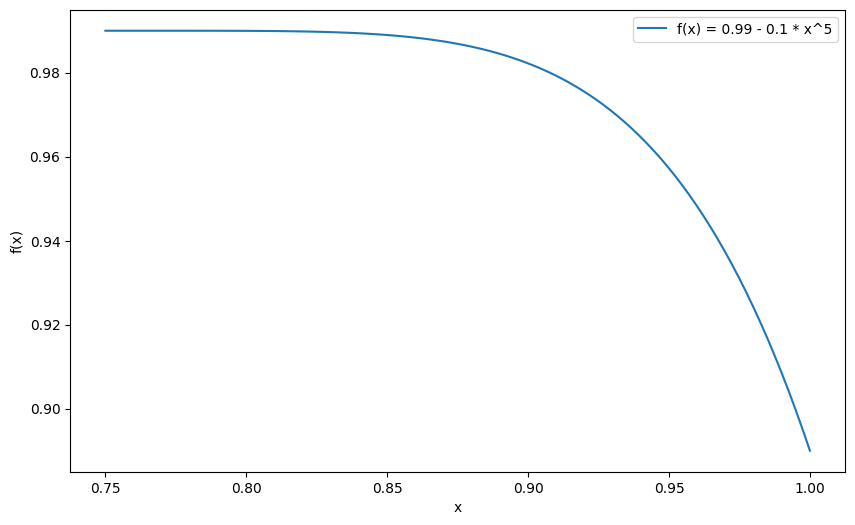

In [129]:
# Define the function
def func(x):
    x = (x - 0.75) / 0.25
    return 0.99 - 0.1 * pow(x, 5)

fig, axs = plt.subplots(1, 1, figsize=(10, 6))
x = np.linspace(0.75, 1, 100)
y = func(x)
axs.plot(x, y, label='f(x) = 0.99 - 0.1 * x^5')
axs.set_xlabel('x')
axs.set_ylabel('f(x)')
axs.legend()


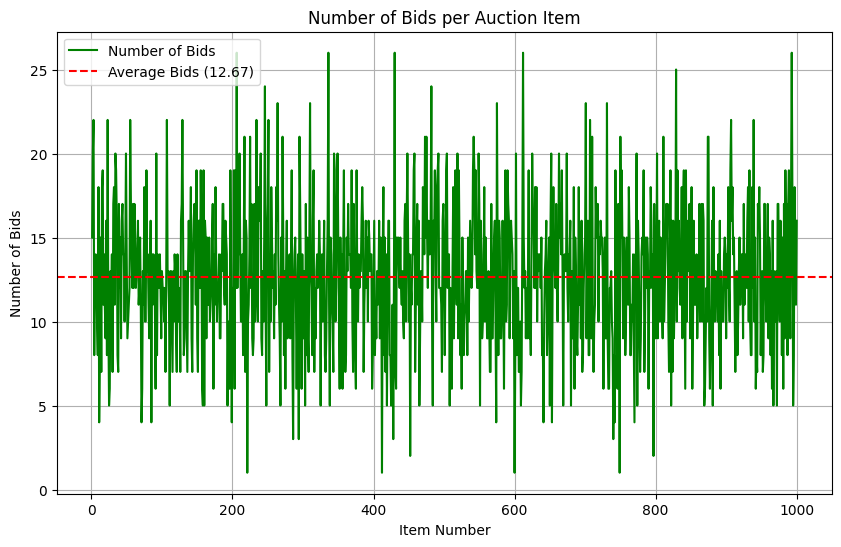

In [130]:
# Plotting the data
fig, axs = plt.subplots(1, 1, figsize=(10, 6))

# Plot the number of bids per item
axs.plot(aggregated_items['ItemNumber'], aggregated_items['count'], color="green", label='Number of Bids')

# Calculate the average number of bids
average_bids = aggregated_items['count'].mean()

# Plot the average number of bids
axs.axhline(y=average_bids, color='red', linestyle='dashed', label=f'Average Bids ({average_bids:.2f})')

# Adding labels and title
axs.set_xlabel('Item Number')
axs.set_ylabel('Number of Bids')
axs.set_title('Number of Bids per Auction Item')

# Adding grid
axs.grid(True)

# Adding legend
axs.legend()

# Display the plot
plt.show()

<Axes: xlabel='count', ylabel='Count'>

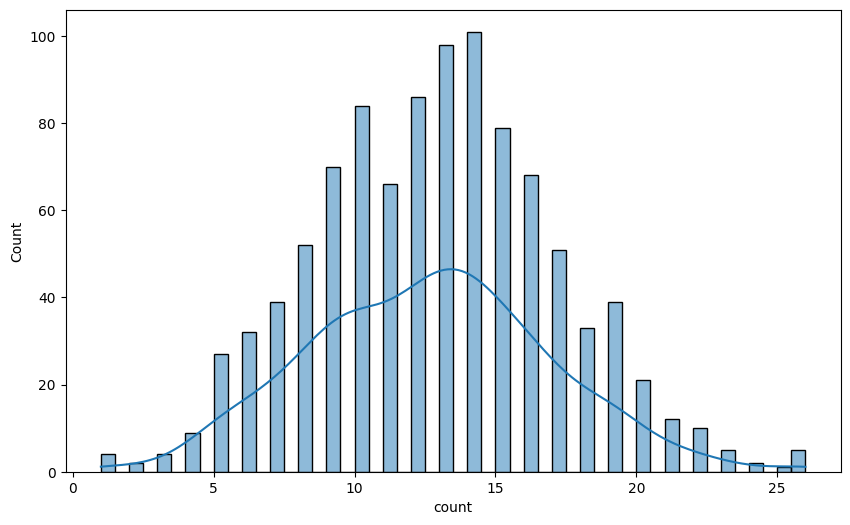

In [131]:
fig, axs = plt.subplots(1, 1, figsize=(10, 6))
sns.histplot(aggregated_items['count'], bins=50, kde=True, ax=axs)

In [132]:
time_aggregated = results_df.groupby('ItemTime').size().reset_index(name='count')
time_aggregated

,ItemTime,count
0,1.2,1
1,2.1,1
2,2.2,1
3,2.3,1
4,2.4,1
...,...,...
566,59.6,157
567,59.7,151
568,59.8,176
569,59.9,179


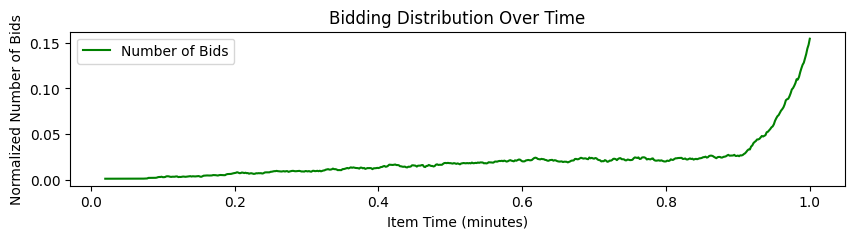

In [133]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming time_aggregated is already defined and contains 'ItemTime' and 'count' columns

# Calculate the rolling average to smooth the data
time_aggregated['smoothed_count'] = time_aggregated['count'].rolling(window=10, min_periods=1).mean()

# Bidding distribution in the auction
fig, axs = plt.subplots(1, 1, figsize=(10, 2))

# Plotting the data as a line plot with smoothed data
axs.plot(time_aggregated['ItemTime'] / 60, time_aggregated['smoothed_count'] / normalizer, color="green", label='Number of Bids')

# Adding labels and title
axs.set_xlabel('Item Time (minutes)')
axs.set_ylabel('Normalized Number of Bids')
axs.set_title('Bidding Distribution Over Time')

# Adding legend
axs.legend()

# Display the plot
plt.show()

In [134]:
# Overlay ebay auction data with our data
ebay_df = pd.read_csv('ebay.csv')

In [135]:
ebay_df

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
0,1638893549,175.00,2.230949,schadenfreud,0.0,99.00,177.50,Cartier wristwatch,3 day auction
1,1638893549,100.00,2.600116,chuik,0.0,99.00,177.50,Cartier wristwatch,3 day auction
2,1638893549,120.00,2.600810,kiwisstuff,2.0,99.00,177.50,Cartier wristwatch,3 day auction
3,1638893549,150.00,2.601076,kiwisstuff,2.0,99.00,177.50,Cartier wristwatch,3 day auction
4,1638893549,177.50,2.909826,eli.flint@flightsafety.co,4.0,99.00,177.50,Cartier wristwatch,3 day auction
...,...,...,...,...,...,...,...,...,...
10676,8214889177,61.00,6.359155,714ark,15.0,0.01,90.01,Xbox game console,7 day auction
10677,8214889177,76.00,6.359294,rjdorman,1.0,0.01,90.01,Xbox game console,7 day auction
10678,8214889177,90.00,6.428738,baylorjeep,3.0,0.01,90.01,Xbox game console,7 day auction
10679,8214889177,88.00,6.760081,jasonjasonparis,18.0,0.01,90.01,Xbox game console,7 day auction


In [136]:
ebay_df = ebay_df.dropna()
# Only keep distinc auctionids
ebay_df_counts = ebay_df.drop_duplicates(subset='auctionid')
# Group by auction type
counts_df = ebay_df_counts.groupby('auction_type').size().reset_index(name='count')
counts_df

,auction_type,count
0,3 day auction,148
1,5 day auction,96
2,7 day auction,383


In [137]:
auctions_3_days = ebay_df.where(ebay_df['auction_type'].str.contains("3 day auction"))
auctions_3_days = auctions_3_days.dropna()
auctions_3_days_len = len(auctions_3_days.groupby('auctionid'))
print('3 day auctions:', auctions_3_days_len)

3 day auctions: 148


In [138]:
auctions_3_days

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
0,1.638894e+09,175.00,2.230949,schadenfreud,0.0,99.0,177.50,Cartier wristwatch,3 day auction
1,1.638894e+09,100.00,2.600116,chuik,0.0,99.0,177.50,Cartier wristwatch,3 day auction
2,1.638894e+09,120.00,2.600810,kiwisstuff,2.0,99.0,177.50,Cartier wristwatch,3 day auction
3,1.638894e+09,150.00,2.601076,kiwisstuff,2.0,99.0,177.50,Cartier wristwatch,3 day auction
4,1.638894e+09,177.50,2.909826,eli.flint@flightsafety.co,4.0,99.0,177.50,Cartier wristwatch,3 day auction
...,...,...,...,...,...,...,...,...,...
8422,8.215611e+09,31.00,2.385764,misschicfashion,13.0,5.0,35.09,Xbox game console,3 day auction
8423,8.215611e+09,32.01,2.385926,misschicfashion,13.0,5.0,35.09,Xbox game console,3 day auction
8424,8.215611e+09,32.00,2.592141,minipc1,104.0,5.0,35.09,Xbox game console,3 day auction
8425,8.215611e+09,35.09,2.973264,bebawl,114.0,5.0,35.09,Xbox game console,3 day auction


In [139]:
auctions_3_days.loc[:, 'bidtime'] = auctions_3_days['bidtime'].round(1)
auctions_3_days = auctions_3_days.groupby('bidtime').size().reset_index(name='count')

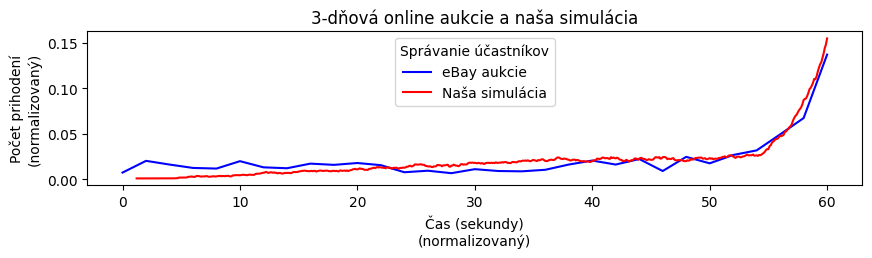

In [140]:
fig, axs = plt.subplots(1, 1, figsize=(10, 2))
plt.subplots_adjust(hspace=0.75)

# Plot 3-day auctions
axs.plot(auctions_3_days['bidtime'] * 20, auctions_3_days['count'] / (auctions_3_days_len * 20) , color='blue', label='eBay aukcie')
axs.plot(time_aggregated['ItemTime'], time_aggregated['smoothed_count'] / normalizer, color='red', label='Naša simulácia')
axs.set_ylabel('Počet prihodení\n(normalizovaný)')
axs.set_xlabel('Čas (sekundy)\n(normalizovaný)')
axs.set_title('3-dňová online aukcie a naša simulácia')
legend = axs.legend(loc='upper center', bbox_to_anchor=(0.5, 1))
legend.set_title('Správanie účastníkov')
plt.show()


## Overenie rozlozenia strategii

In [141]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

strategies_df = pd.read_csv('auction_strategies_results.csv')
strategies_df

,Agent,Ratchet,Sniper,None
0,2315,993,152,0
1,2260,1026,172,0
2,2330,966,164,0
3,2321,983,156,0
4,2289,993,178,0
5,2324,974,161,0
6,2261,1035,164,0
7,2344,952,164,0
8,2336,969,154,0
9,2269,1032,159,0


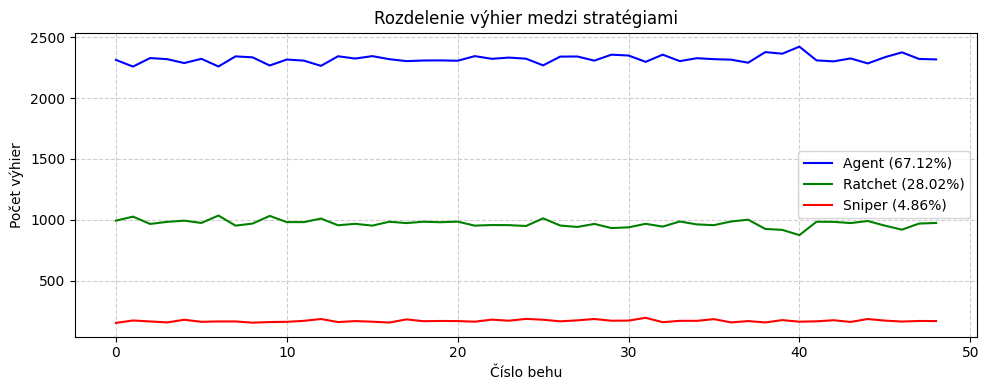

In [147]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the strategies data
strategies_df = pd.read_csv('auction_strategies_results.csv')

total_rows = len(strategies_df)

total_agent = strategies_df['Agent'].sum()
total_ratchet = strategies_df['Ratchet'].sum()
total_sniper = strategies_df['Sniper'].sum()

percent_agent = (total_agent / (total_agent + total_ratchet + total_sniper)) * 100
percent_ratchet = (total_ratchet / (total_agent + total_ratchet + total_sniper)) * 100
percent_sniper = (total_sniper / (total_agent + total_ratchet + total_sniper)) * 100

fig, axs = plt.subplots(1, 1, figsize=(10, 4))

axs.plot(strategies_df.index, strategies_df['Agent'], label=f'Agent ({percent_agent:.2f}%)', color='blue')
axs.plot(strategies_df.index, strategies_df['Ratchet'], label=f'Ratchet ({percent_ratchet:.2f}%)', color='green')
axs.plot(strategies_df.index, strategies_df['Sniper'], label=f'Sniper ({percent_sniper:.2f}%)', color='red')

axs.set_xlabel('Číslo behu')
axs.set_ylabel('Počet výhier')
axs.set_title('Rozdelenie výhier medzi stratégiami')

# Adding grid
axs.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
axs.legend()

plt.show()